In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
def build_and_train_model(activation_function):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation=activation_function),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)

    return history

In [4]:
# ReLU
history_relu = build_and_train_model('relu')
# Sigmoid
history_sigmoid = build_and_train_model('sigmoid')
# Tanh
history_tanh = build_and_train_model('tanh')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


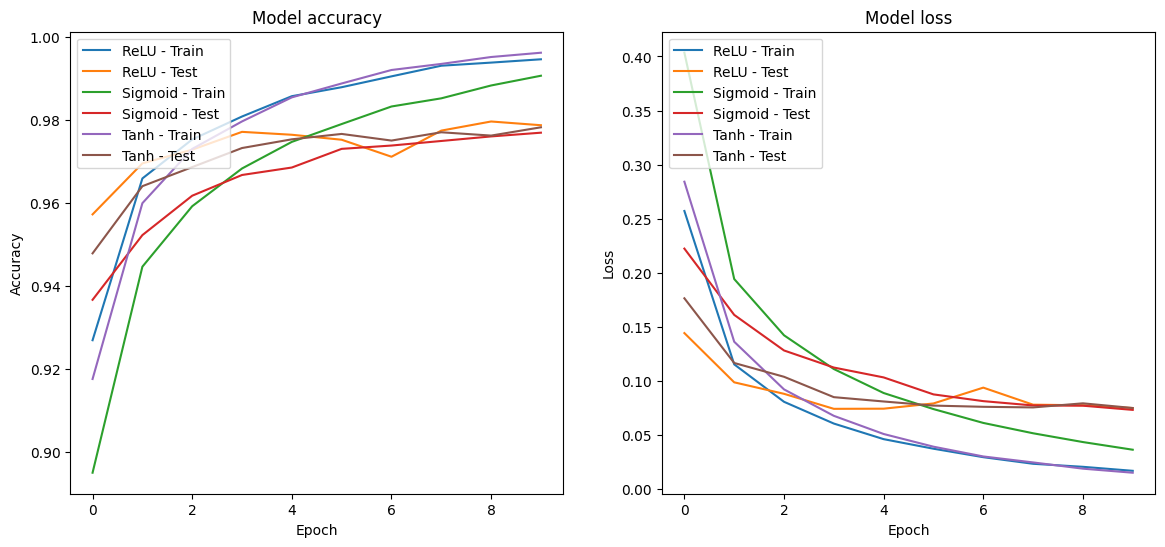

In [5]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history_relu.history['accuracy'], label='ReLU - Train')
plt.plot(history_relu.history['val_accuracy'], label='ReLU - Test')
plt.plot(history_sigmoid.history['accuracy'], label='Sigmoid - Train')
plt.plot(history_sigmoid.history['val_accuracy'], label='Sigmoid - Test')
plt.plot(history_tanh.history['accuracy'], label='Tanh - Train')
plt.plot(history_tanh.history['val_accuracy'], label='Tanh - Test')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_relu.history['loss'], label='ReLU - Train')
plt.plot(history_relu.history['val_loss'], label='ReLU - Test')
plt.plot(history_sigmoid.history['loss'], label='Sigmoid - Train')
plt.plot(history_sigmoid.history['val_loss'], label='Sigmoid - Test')
plt.plot(history_tanh.history['loss'], label='Tanh - Train')
plt.plot(history_tanh.history['val_loss'], label='Tanh - Test')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()